In [29]:
import matplotlib.pyplot as plt
from razredi import *
from jarvis_march import grid_peel_jarvis
from graham_scan import grid_peel_graham
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import scipy
from matplotlib import cm

#%matplotlib inline

# Funkcija za risanje grafov
Definirana je funkcija, ki nariše grafe. V parameter pikice ji lahko podamo "o", če jih želimo. Sicer nariše brez označenih vozlišč.

In [2]:
def narisi(rezultat_grid_peel, pikice=None):
    slovar_ovojnic = rezultat_grid_peel[1]
    for i in range(len(slovar_ovojnic)):
        seznam_x = []
        seznam_y = []
        for tocka in slovar_ovojnic[i]:
            seznam_x.append(tocka.x)
            seznam_y.append(tocka.y)
        seznam_x += [seznam_x[0]]
        seznam_y += [seznam_y[0]]
        
        if pikice=="o":
            plt.plot(seznam_x,seznam_y,"-o")
        else:
            plt.plot(seznam_x,seznam_y,'-')

Primer grid-peelinga na 10x10 mreži

Število ovojnic:  12


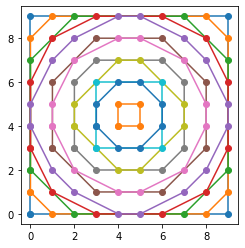

In [3]:
f = plt.figure()
mreza_j = enakomerna_mreza(10,15)
mreza_g = enakomerna_mreza(10,10)
#narisi(grid_peel_jarvis(mreza_j))
graham = grid_peel_graham(mreza_g)
narisi(graham,'o')
plt.axis('square')
#f.savefig("11x11.png", bbox_inches='tight', dpi=600)
print("Število ovojnic: ", graham[0])

Primer grid-peelinga na 15x10 mreži. Tu tudi vidimo, da število ovojnic $m\times n$ mreže ni enako $min\{m,n\}\times min\{m,n\}$

Število ovojnic: 16


([], [])

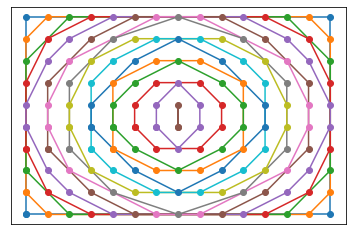

In [4]:
graham_10x15 = grid_peel_graham(enakomerna_mreza(15,10))
print("Število ovojnic:",graham_10x15[0])
g = plt.figure()
narisi(graham_10x15,'o')
plt.xticks([])
plt.yticks([])
#plt.savefig("15x10_enakomerna.jpg",bbox_inches='tight', dpi=300)

Spodaj je prikazan graf odvisnosti števila ovojnic od parametrov mreže. Previdno s poganjanjem, traja kar nekaj časa.

Vizualizacija je v celoti povzeta po tem [Stack-overflow zapisu](https://stackoverflow.com/questions/53506257/fitting-3d-data?noredirect=1&lq=1). ```SurfacePlot``` nam izriše ploskev, aproksimirano iz podatkov, pridobljenih iz spodnje celice. Pri tem si pomagamo s knjižnico ```NumPy```. Predvidevamo, da bo ploskev oblike $ax^{\alpha}y^{\beta}$. Če želimo videti le število ovojnic (brez prileganja), v spodnjih vrsticah odstranimo komentarje pred ```ScatterPlot```.

In [22]:
sez_x = []
sez_y = []
sez_z = []
for i in range(3,50):
    for j in range(3,50):
        st = grid_peel_graham(enakomerna_mreza(i,j))
        sez_x.append(i)
        sez_y.append(j)
        sez_z.append(len(st[1]))

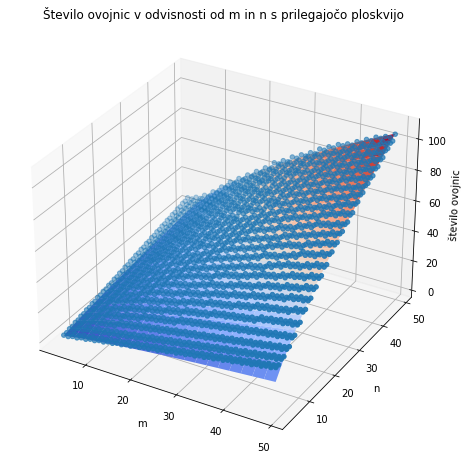

Ocenjeni parametri: alfa= 0.6242419289902886 a= 0.6588696526905352 b= 0.6588696525711668


In [65]:
def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(8.0, 6.0))#, dpi=100)

    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = np.linspace(min(x_data), max(x_data), 20)
    yModel = np.linspace(min(y_data), max(y_data), 20)
    X, Y = np.meshgrid(xModel, yModel)

    Z = func(np.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
    
    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Število ovojnic v odvisnosti od m in n s prilegajočo ploskvijo')
    axes.set_xlabel('m')
    axes.set_ylabel('n')
    axes.set_zlabel('število ovojnic')

    #plt.savefig("slike/mxn_3d_fit.jpg",bbox_inches='tight', dpi=300)
    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems

def ScatterPlot(data):
    f = plt.figure(figsize=(4.0, 4.0), dpi=100)

    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Število ovojnic v odvisnosti od m in n')
    axes.set_xlabel('m')
    axes.set_ylabel('n')
    axes.set_zlabel('število ovojnic')

    #plt.savefig("slike/mxn_3d_tocke_fit.jpg",bbox_inches='tight', dpi=300)
    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems

def func(data, a, alpha, beta):
    x = data[0]
    y = data[1]
    return a * (x**alpha) * (y**beta)

if __name__ == "__main__":
    xData = np.array(sez_x)
    yData = np.array(sez_y)
    zData = np.array(sez_z)

    data = [xData, yData, zData]

    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, _ = scipy.optimize.curve_fit(func, [xData, yData], zData, p0 = initialParameters)

    #ScatterPlot(data)
    SurfacePlot(func, data, fittedParameters)
    
    
    print('Ocenjeni parametri:', 'alfa=', fittedParameters[0], 'a=', fittedParameters[1],'b=',fittedParameters[2])

Zgoraj torej vidimo, da se število ovojnic $m\times n$ mreže spreminja približno kot ploskev $\frac{2}{3}x^{\frac{2}{3}}y^{\frac{2}{3}}$.



Prikazana je primerjava med $min\{m,n\}\times min\{m,n\}$ ter $m\times n$ mrežo.

In [41]:
def test_mxn(m,n):
    seznam = []
    for i in range(3,m):
        for j in range(3,n):
            min_mn = enakomerna_mreza(min(i,j),min(i,j))
            navadna = enakomerna_mreza(i,j)
            seznam.append((i,j,grid_peel_graham(min_mn)[0],grid_peel_graham(navadna)[0]))
    return seznam
sez_test = test_mxn(25,25)

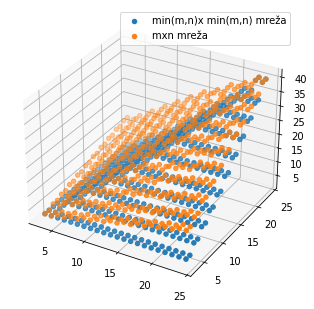

In [43]:
x,y,z1,z2 = zip(*sez_test)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x,y,z1, label = "min(m,n)x min(m,n) mreža")
ax.scatter(x,y,z2, label = "mxn mreža")
plt.legend()
plt.show()

Primera potenčne in Cantorjeve mreže

(0.25, 16.75, 0.25, 16.75)

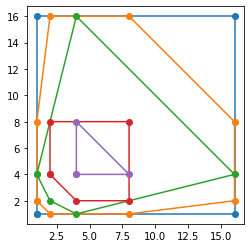

In [40]:
graham_potencna = grid_peel_graham(naredi_potencno(5,5))
f = plt.figure()
narisi(graham_potencna, "o")
plt.axis('square')
#f.savefig("5x5_potencna.png", bbox_inches='tight', dpi=600)

(-43.05, 46.05, -43.05, 46.05)

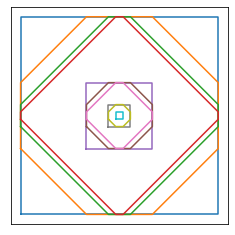

In [8]:
graham_cant = grid_peel_graham(kvazi_cantor_mreza(4))
narisi(graham_cant)
plt.xticks([])
plt.yticks([])
plt.axis('square')
#plt.savefig("kvazi_cantor.jpg",bbox_inches='tight', dpi=300)

# Merjenje časa
Zanimalo naju je, kako se spreminja dejanski čas računanja mrež. Seveda je dejanski čas trajanja odvisen od mnogo okoliščin (računalnika, koliko je v trenutku poganjanja obremenjen, ...), vendar se jasno vidi, da je Grahamov pregled veliko hitrejši od Jarvisovega sprehoda.

In [16]:
def izmeri_cas_enakomerna(velikost_mreze):
    seznam_graham = []
    seznam_jarvis = []
    for i in range(15,velikost_mreze):
        mreza = enakomerna_mreza(i,i)
        graham_c = grid_peel_graham(mreza)[2]
        jarvis_c = grid_peel_jarvis(mreza)[2]
        seznam_graham.append((i,graham_c))
        seznam_jarvis.append((i,jarvis_c))
    return (seznam_graham, seznam_jarvis)

*Opomba:* izvajanje spodnje celice traja precej časa!

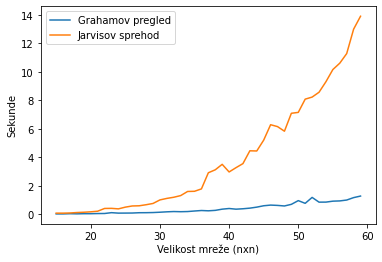

In [93]:
cas_g, cas_j = izmeri_cas(60)
graf_cas = plt.figure()
plt.plot(*zip(*cas_g), label = "Grahamov pregled")
plt.plot(*zip(*cas_j), label = "Jarvisov sprehod")
plt.xlabel("Velikost mreže (nxn)")
plt.ylabel("Sekunde")
plt.legend()
#plt.savefig("cas.jpg",bbox_inches='tight', dpi=300)

In [27]:
def izmeri_cas_cant(velikost_mreze):
    seznam_graham = []
    seznam_graham_c = []
    seznam_graham_p = []
    for i in range(15,velikost_mreze):
        enakomerna = enakomerna_mreza(2*i,2*i)
        potencna = naredi_potencno(2*i,2*i)
        cantor = kvazi_cantor_mreza(i)

        graham_c = grid_peel_graham(enakomerna)[2]
        graham_cant_c = grid_peel_graham(cantor)[2]
        graham_potencna = grid_peel_graham(potencna)[2]
        seznam_graham.append((i,graham_c))
        seznam_graham_c.append((i,graham_cant_c))
        seznam_graham_p.append((i,graham_potencna)) 
    return (seznam_graham, seznam_graham_c, seznam_graham_p)

Ponovljen graf, tokrat še s "Cantorjevo" mrežo. Računanje le-te traja najdlje.

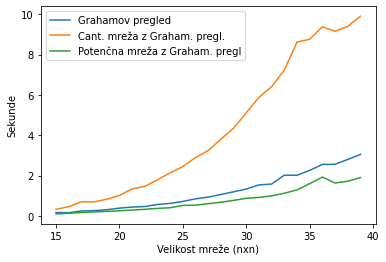

In [67]:
cas_g, cas_cant, cas_p = izmeri_cas_cant(40)
graf_cas_cant = plt.figure()
plt.plot(*zip(*cas_g), label = "Grahamov pregled")
plt.plot(*zip(*cas_cant), label = "Cant. mreža z Graham. pregl.")
plt.plot(*zip(*cas_p), label = "Potenčna mreža z Graham. pregl")
plt.xlabel("Velikost mreže (nxn)")
plt.ylabel("Sekunde")
plt.legend()
#plt.savefig("primerjava_casov.jpg",bbox_inches='tight', dpi=300)

# Primerjava števila ovojnic
Zanimalo naju je, kako se število ovojnic spreminja z večanjem mreže.

*Opomba*: v enakomerni mreži so parametri pomnoženi z dva, da ustrezajo številu vozlišč "Cantorjeve" mreže (ta ima pri danem n na vsaki stranici 2n vozlišč)

In [46]:
def st_ovojnic(velikost_mreze):
    seznam_graham_e = []
    st_graham_e = []
    seznam_graham_c = []
    st_graham_c = []
    seznam_graham_p = []
    st_graham_p = []
    for i in range(velikost_mreze):
        enakomerna = enakomerna_mreza(2*i,2*i)
        potencna = naredi_potencno(2*i,2*i)
        cantor = kvazi_cantor_mreza(i)
        graham_e = len(grid_peel_graham(enakomerna)[1])
        graham_c = len(grid_peel_graham(cantor)[1])
        graham_p = len(grid_peel_graham(potencna)[1])
        seznam_graham_e.append((i, graham_e))
        seznam_graham_c.append((i,graham_c))
        seznam_graham_p.append((i,graham_p))
        st_graham_e.append(graham_e)
        st_graham_c.append(graham_c)
        st_graham_p.append(graham_p)
    return (seznam_graham_e, seznam_graham_c, seznam_graham_p, st_graham_e, st_graham_c, st_graham_p)

seznami_stevilo = st_ovojnic(35)


S funkcijo ``power_law`` si pomagamo pri aproksimaciji podatkov (ta vrne $ax^{b}$). Spodaj vidimo dejanske parametre,
narisali smo jih malo zamaknjene (sicer bi se krivulje popolnoma prekrivale). Vidimo, da se teoretične vrednosti iz literature prilegajo eksperimentalnim podatkom. Če bi opravili več izračunov, bi verjetno dobili tudi boljša prileganja.

[0.59920833 1.95646387] [2.32495464 1.01758756]


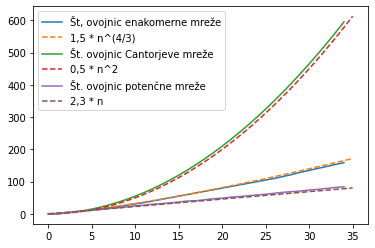

In [55]:
def power_law(x, a, b):
    return a*np.power(x, b)

x = [i for i in range(35)]
x1 = np.linspace(0, 35, 10000)
graf = plt.figure()
pars_c, _ = curve_fit(f=power_law, xdata=x, ydata=seznami_stevilo[4])
pars_p, _ = curve_fit(f=power_law, xdata=x, ydata=seznami_stevilo[5])
print(pars_c,pars_p)
#print()
plt.plot(*zip(*seznami_stevilo[0]), label = "Št, ovojnic enakomerne mreže")
plt.plot(x1, 1.5 * x1 ** (4/3), label = "1,5 * n^(4/3)", linestyle="dashed")
plt.plot(*zip(*seznami_stevilo[1]), label = "Št. ovojnic Cantorjeve mreže")
plt.plot(x1, 0.5 * x1 ** 2, label = "0,5 * n^2", linestyle="dashed")
plt.plot(*zip(*seznami_stevilo[2]), label = "Št. ovojnic potenčne mreže")
plt.plot(x1, 2.3 * x1, label = "2,3 * n", linestyle="dashed")
plt.legend()
#plt.savefig("slike/st_ovojnic.jpg",bbox_inches='tight', dpi=600)

Opazila sva nenavadno obnašanje števila ovojnic Cantorjeve mreže, ko presežemo mejo i=35 - še vedno ga ne znava pojasniti. Verjetno gre za napake pri operiranju z zelo velikimi števili $\left(3^{40} \text{in več}\right)$

*Opomba*: izvajanje spodnje celice traja kar precej časa!

In [4]:
sez = []
for i in range(30,60):
    sez.append((i,grid_peel_graham(kvazi_cantor_mreza(i))[0]))

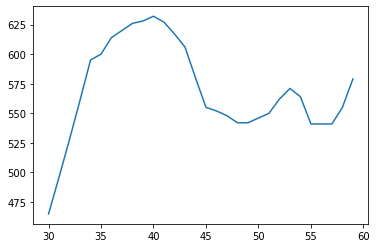

In [5]:
plt.plot(*zip(*sez))